# Pair Programming Intro Regresión Lineal

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. 

Para eso recordad que:
- Deberéis separar la X y la y.
- Deberéis crear el train y el test.
- Ajustar vuestro modelo.

Happy coding 🤔

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


In [2]:
sales = pd.read_csv('ficheros/sales5.csv')
sales.head()

,profit,margin,sales,cogs,total_expenses,marketing,inventory,budget_profit,budget_margin,budget_sales,market_encoding,market_size_encoding,año_encoding,Coffee,Espresso,Herbal Tea,Tea
0,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,160.0,270.0,3,0,0,1,0,0,0
1,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,130.0,210.0,3,0,0,1,0,0,0
2,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,180.0,290.0,3,0,0,1,0,0,0
3,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,160.0,260.0,3,0,0,1,0,0,0
4,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,130.0,210.0,3,0,1,1,0,0,0


## Cross-validation

In [3]:
X = sales.drop("profit", axis = 1)
y = sales["profit"]

In [4]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
lr = LinearRegression(n_jobs=-1)

In [6]:
cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.021910,0.003001,0.666647,-25.553536
1,0.009994,0.003009,0.751628,-24.198728
2,0.007115,0.002005,0.768297,-18.483979
3,0.006007,0.002986,0.861531,-14.079533
4,0.006006,0.003506,0.620703,-30.790963
5,0.004501,0.002509,0.768360,-22.176865
6,0.006499,0.002498,0.532977,-35.041402
7,0.005003,0.001500,0.750175,-27.066587
8,0.005003,0.002498,0.767270,-25.176656
9,0.005004,0.000997,0.765331,-22.381764


In [8]:
print(f'La media para el r2 es {cv_scores["test_r2"].mean().round(2)}')
print(f'La media para el RMSE es {abs(cv_scores["test_neg_root_mean_squared_error"].mean()).round(2)}')

La media para el r2 es 0.73
La media para el RMSE es 24.5


## Regresión lineal y residuos

In [9]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [10]:
y_predict_train = lr.predict(x_train)
y_predict_test = lr.predict(x_test)

In [11]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
3651,25.0,45.788831,Train
1659,23.0,20.824898,Train
3824,30.0,33.500470,Train
3173,125.0,97.709345,Train
3155,28.0,40.047130,Train


In [12]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
3651,25.0,45.788831,Train,-20.788831
1659,23.0,20.824898,Train,2.175102
3824,30.0,33.500470,Train,-3.500470
3173,125.0,97.709345,Train,27.290655
3155,28.0,40.047130,Train,-12.047130


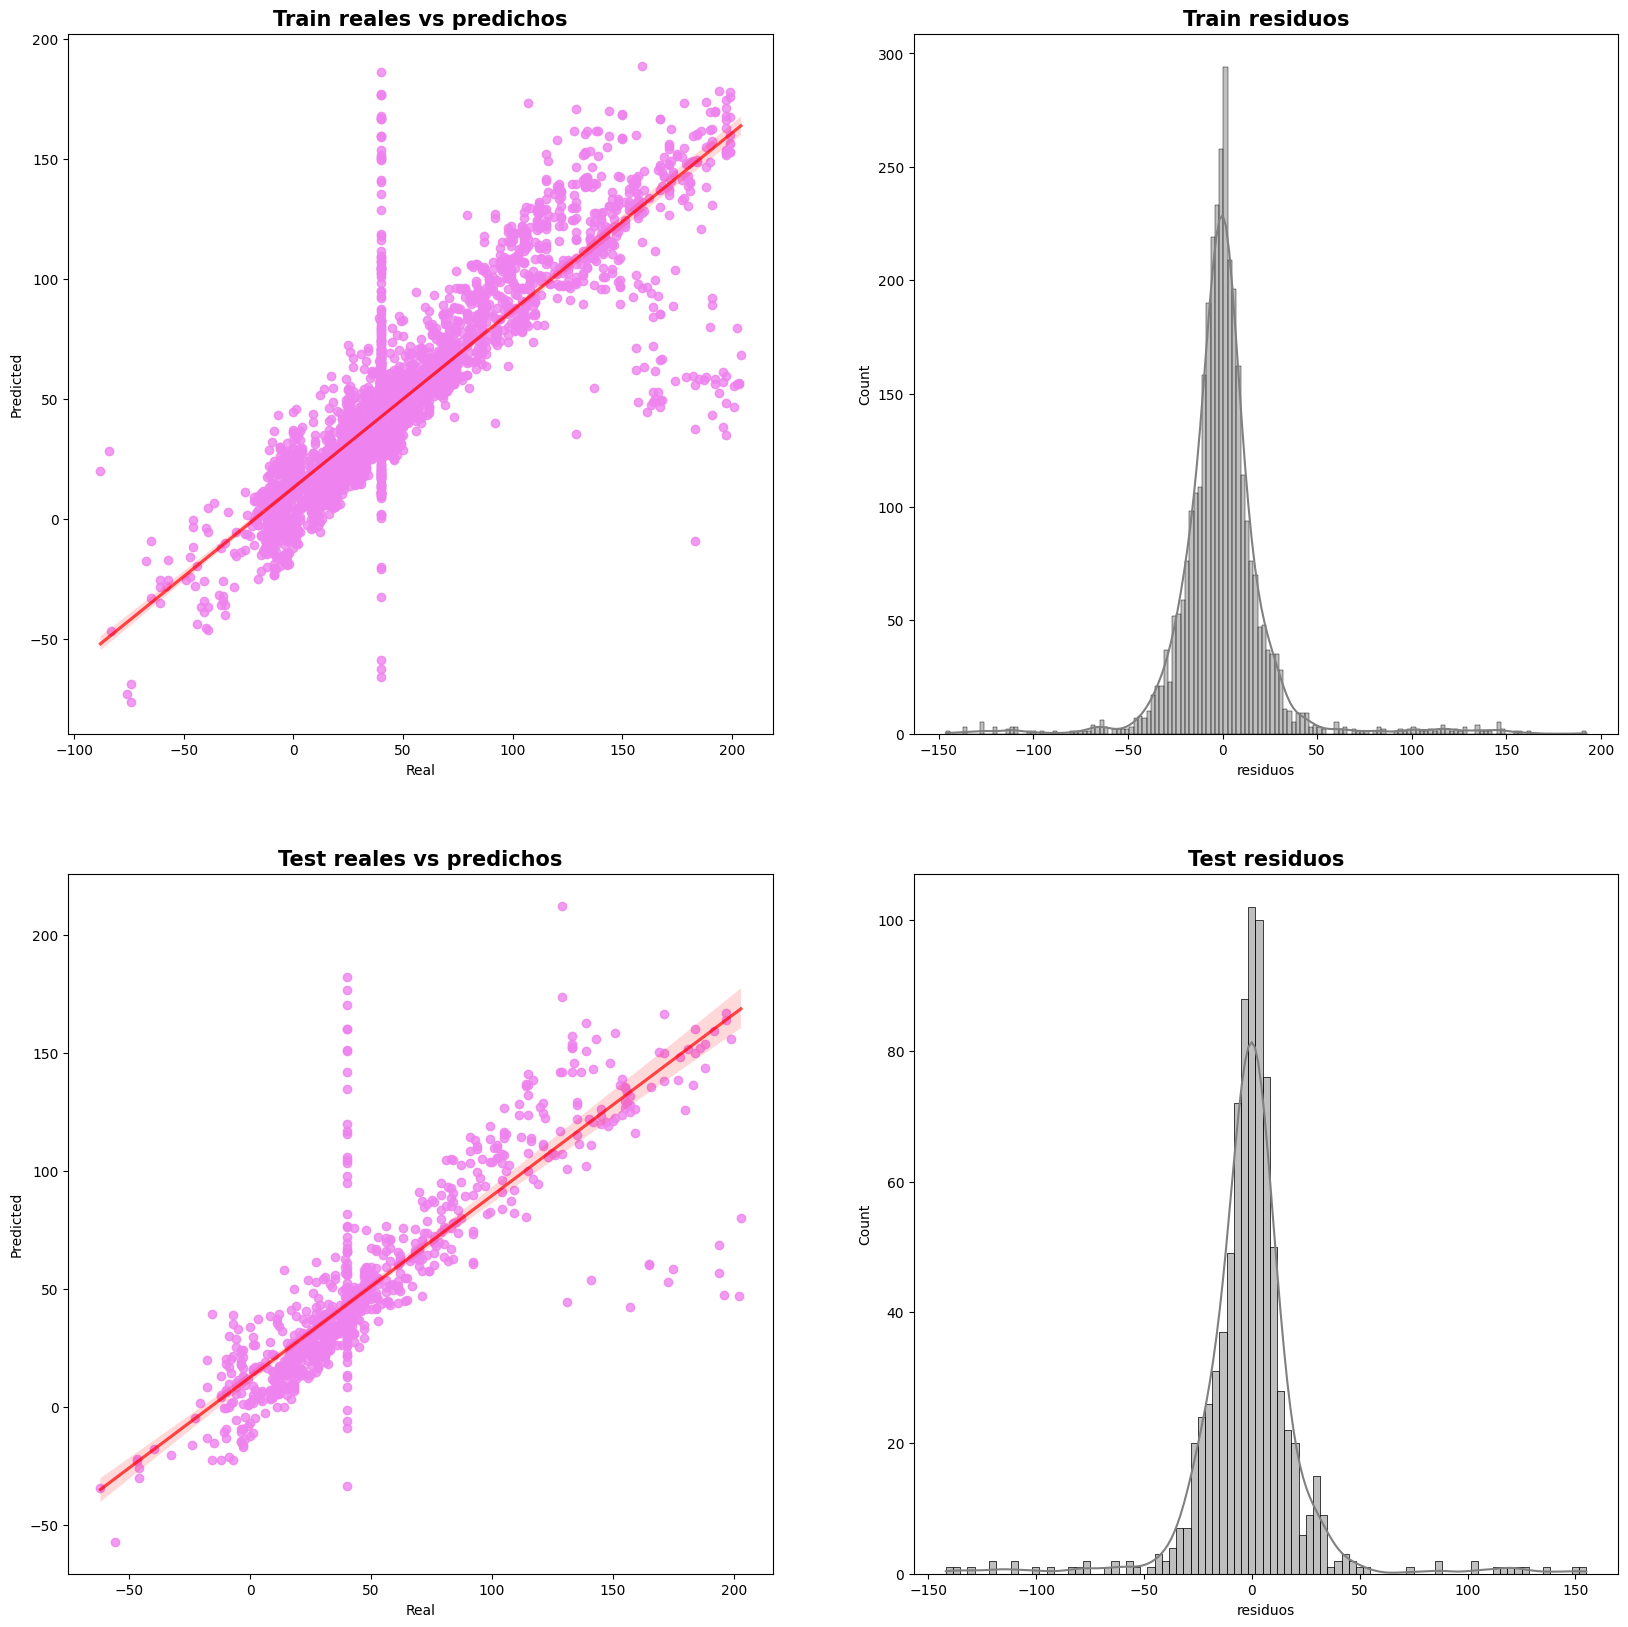

In [13]:
fig, ax = plt.subplots(2,2,figsize=(20,20))

sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "violet",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "violet",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])

sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

- Vemos que los datos se ajustan a la recta, pero destacamos una linea completamente vertical que nos cuadra con la sustitución que hicimos de los outliers por la mediana.

In [14]:
sales["profit"].median()

40.0